In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from scipy.stats import loguniform, randint, uniform

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\aldhu\Desktop\Projects\Data\ACME-HappinessSurvey2020.csv")
print("Data loaded successfully")

Data loaded successfully


In [6]:
# Data exploration
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nShape of the dataset:")
print(df.shape)

print("\nInformation about the dataset:")
print(df.info())

print("\nStatistical summary:")
print(df.describe())

print("\nUnique value counts:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

print("\nMissing values in each column:")
print(df.isnull().sum())


First 5 rows of the dataset:
   Y  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5

Shape of the dataset:
(126, 7)

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB
None

Statistical summary:
                Y          X1          X2          X3          X4          X5  \
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000   
mean     0.547619    4.333333    2.531746    3.309524    3.746032    3.650794   
std  

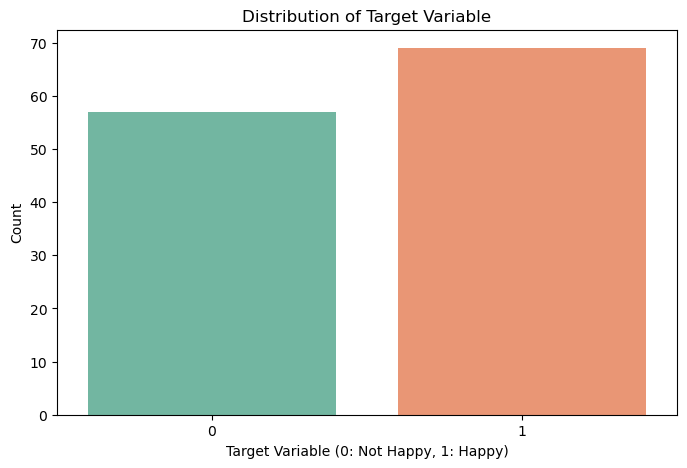

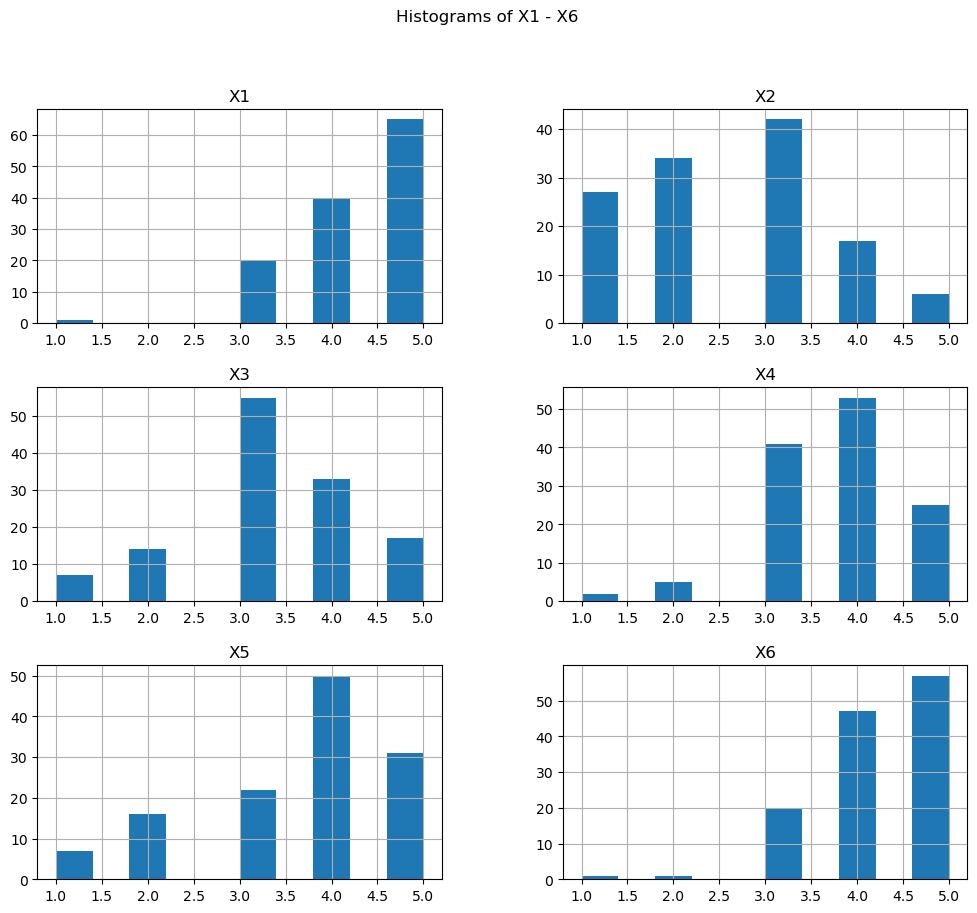

In [7]:
# Visualize the data
plt.figure(figsize=(8, 5))
sns.countplot(x='Y', data=df, palette='Set2')
plt.title("Distribution of Target Variable")
plt.xlabel("Target Variable (0: Not Happy, 1: Happy)")
plt.ylabel("Count")
plt.show()

df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']].hist(figsize=(12, 10))
plt.suptitle("Histograms of X1 - X6")
plt.show()

In [8]:
# Checking the distribution of target values
print(df['Y'].value_counts())

1    69
0    57
Name: Y, dtype: int64


In [9]:
# Split the data
X = df.drop(['Y'], axis=1)
y = df['Y']

In [10]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [11]:
# Create and fit the RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("RandomForestClassifier Results:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"ROC AUC: {roc_auc_rf}")

RandomForestClassifier Results:
Accuracy: 0.6153846153846154
Precision: 0.5294117647058824
Recall: 0.8181818181818182
F1 Score: 0.6428571428571428
ROC AUC: 0.6424242424242426


In [12]:
# Create and fit the ExtraTreesClassifier model
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_classifier.fit(X_train, y_train)
y_pred_extra_trees = extra_trees_classifier.predict(X_test)
accuracy_extra_trees = accuracy_score(y_test, y_pred_extra_trees)
precision_extra_trees = precision_score(y_test, y_pred_extra_trees)
recall_extra_trees = recall_score(y_test, y_pred_extra_trees)
f1_extra_trees = f1_score(y_test, y_pred_extra_trees)
roc_auc_extra_trees = roc_auc_score(y_test, y_pred_extra_trees)
print("ExtraTreesClassifier Results:")
print(f"Accuracy: {accuracy_extra_trees}")
print(f"Precision: {precision_extra_trees}")
print(f"Recall: {recall_extra_trees}")
print(f"F1 Score: {f1_extra_trees}")
print(f"ROC AUC: {roc_auc_extra_trees}")

ExtraTreesClassifier Results:
Accuracy: 0.6153846153846154
Precision: 0.5333333333333333
Recall: 0.7272727272727273
F1 Score: 0.6153846153846153
ROC AUC: 0.6303030303030304


In [13]:
# Create and fit the KNeighborsClassifier model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
print("KNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")
print(f"ROC AUC: {roc_auc_knn}")

KNeighborsClassifier Results:
Accuracy: 0.5
Precision: 0.45454545454545453
Recall: 0.9090909090909091
F1 Score: 0.6060606060606061
ROC AUC: 0.5545454545454545


In [14]:
# Create and fit the SVC model
svc_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
roc_auc_svc = roc_auc_score(y_test, y_pred_svc)
print("SVC Results:")
print(f"Accuracy: {accuracy_svc}")
print(f"Precision: {precision_svc}")
print(f"Recall: {recall_svc}")
print(f"F1 Score: {f1_svc}")
print(f"ROC AUC: {roc_auc_svc}")

SVC Results:
Accuracy: 0.46153846153846156
Precision: 0.42857142857142855
Recall: 0.8181818181818182
F1 Score: 0.5625
ROC AUC: 0.5090909090909091


In [15]:
# Create and fit the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [16]:
# Make predictions
y_pred_logistic_regression = logistic_regression.predict(X_test)

In [17]:
# Calculate evaluation metrics
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
precision_logistic_regression = precision_score(y_test, y_pred_logistic_regression)
recall_logistic_regression = recall_score(y_test, y_pred_logistic_regression)
f1_logistic_regression = f1_score(y_test, y_pred_logistic_regression)
roc_auc_logistic_regression = roc_auc_score(y_test, y_pred_logistic_regression)

In [18]:
# Print the results
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic_regression}")
print(f"Precision: {precision_logistic_regression}")
print(f"Recall: {recall_logistic_regression}")
print(f"F1 Score: {f1_logistic_regression}")
print(f"ROC AUC: {roc_auc_logistic_regression}")

Logistic Regression Results:
Accuracy: 0.46153846153846156
Precision: 0.4117647058823529
Recall: 0.6363636363636364
F1 Score: 0.5
ROC AUC: 0.48484848484848486


In [19]:
# Create and fit the XGBClassifier model
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [20]:
# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test)

In [21]:
# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)

In [22]:
# Print the results
print("XGBClassifier Results:")
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")
print(f"ROC AUC: {roc_auc_xgb}")

XGBClassifier Results:
Accuracy: 0.6538461538461539
Precision: 0.5714285714285714
Recall: 0.7272727272727273
F1 Score: 0.64
ROC AUC: 0.6636363636363637


In [23]:
# Create and fit the DecisionTreeClassifier model
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
# Make predictions
y_pred_decision_tree = decision_tree_classifier.predict(X_test)

In [25]:
# Calculate evaluation metrics
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)
roc_auc_decision_tree = roc_auc_score(y_test, y_pred_decision_tree)

In [26]:
# Print the results
print("DecisionTreeClassifier Results:")
print(f"Accuracy: {accuracy_decision_tree}")
print(f"Precision: {precision_decision_tree}")
print(f"Recall: {recall_decision_tree}")
print(f"F1 Score: {f1_decision_tree}")
print(f"ROC AUC: {roc_auc_decision_tree}")

DecisionTreeClassifier Results:
Accuracy: 0.6153846153846154
Precision: 0.5333333333333333
Recall: 0.7272727272727273
F1 Score: 0.6153846153846153
ROC AUC: 0.6303030303030304


In [31]:
# Further refined parameter grid for KNN hyperparameter tuning
knn_param_further_refined = {
    'n_neighbors': list(range(1, 21)),  
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3],  # Adding Minkowski distance with p=3
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': list(range(10, 51, 5)) 
}

RandomForestClassifier Results:
Accuracy: 61.54%
ExtraTreesClassifier Results:
Accuracy: 61.54%
KNeighborsClassifier Results:
Accuracy: 50.00%
SVC Results:
Accuracy: 46.15%
Logistic Regression Results:
Accuracy: 46.15%
XGBClassifier Results:
Accuracy: 65.38%
DecisionTreeClassifier Results:
Accuracy: 61.54%


In [55]:
# Further refined parameter grid for KNN hyperparameter tuning
knn_param_further_refined = {
    'n_neighbors': list(range(1, 30)),  
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': list(range(10, 51, 5)) 
}

knn_classifier = KNeighborsClassifier()


knn_grid_search_further_refined = GridSearchCV(
    knn_classifier,
    param_grid=knn_param_further_refined,
    scoring='accuracy',
    cv=6,
    n_jobs=-1
)

knn_grid_search_further_refined.fit(X_train, y_train)

print("Best Hyperparameters for K-Nearest Neighbors (KNN):", knn_grid_search_further_refined.best_params_)
print("Best Accuracy for K-Nearest Neighbors (KNN):", knn_grid_search_further_refined.best_score_)

Best Hyperparameters for K-Nearest Neighbors (KNN): {'algorithm': 'ball_tree', 'leaf_size': 15, 'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
Best Accuracy for K-Nearest Neighbors (KNN): 0.6501225490196079


In [49]:
# Adjusted parameter distribution for KNN
knn_param_dist_refined = {
    'n_neighbors': list(range(15, 25)),  
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3],  
    'algorithm': ['auto'],  
    'leaf_size': list(range(20, 31))  
}


knn_classifier_refined = KNeighborsClassifier()


knn_random_search_refined = RandomizedSearchCV(
    knn_classifier_refined,
    param_distributions=knn_param_dist_refined,
    n_iter=100,  
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)


knn_random_search_refined.fit(X_train, y_train)


print("Best Hyperparameters for Randomized K-Nearest Neighbors (KNN):", knn_random_search_refined.best_params_)
print("Best Accuracy for Randomized K-Nearest Neighbors (KNN):", knn_random_search_refined.best_score_)

Best Hyperparameters for Randomized K-Nearest Neighbors (KNN): {'weights': 'uniform', 'p': 1, 'n_neighbors': 24, 'leaf_size': 20, 'algorithm': 'auto'}
Best Accuracy for Randomized K-Nearest Neighbors (KNN): 0.64


In [53]:
# Expanded parameter grid for Logistic Regression hyperparameter tuning
logistic_super_expanded_param_grid = {
    'C': [1, 5, 10, 15, 20, 25, 30, 35, 40, 50, 100],  
    'penalty': ['l1', 'l2', 'elasticnet'],  
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  
    'l1_ratio': [0.01, 0.05, 0.1, 0.15, 0.2],  
}

logistic_classifier = LogisticRegression(max_iter=5000, random_state=500)

logistic_grid_search_super_expanded = GridSearchCV(
    logistic_classifier,
    param_grid=logistic_super_expanded_param_grid,
    scoring='accuracy',
    cv=9,
    n_jobs=-1
)

logistic_grid_search_super_expanded.fit(X_train, y_train)

print("GridSearch Logistic Regression - Best Hyperparameters:", logistic_grid_search_super_expanded.best_params_)
print("GridSearch Logistic Regression - Best Accuracy:", logistic_grid_search_super_expanded.best_score_)

Super Expanded GridSearch Logistic Regression - Best Hyperparameters: {'C': 10, 'l1_ratio': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Super Expanded GridSearch Logistic Regression - Best Accuracy: 0.6296296296296298


C:\Users\aldhu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3465 fits failed out of a total of 7425.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
495 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aldhu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aldhu\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aldhu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solve

In [54]:
# Refined parameter grid for Logistic Regression hyperparameter tuning using RandomizedSearchCV
logistic_param_dist_further_refined = {
    'C': loguniform(0.01, 10),  
    'penalty': ['l1', 'l2'],  
    'solver': ['saga'] 
}

logistic_classifier_further_refined = LogisticRegression(max_iter=5000)

logistic_random_search_further_refined = RandomizedSearchCV(
    logistic_classifier_further_refined,
    param_distributions=logistic_param_dist_further_refined,
    n_iter=100,  
    scoring='accuracy',
    cv=10,  
    n_jobs=-1,
    random_state=42
)

logistic_random_search_further_refined.fit(X_train, y_train)

print("Randomized Logistic Regression - Best Hyperparameters:", logistic_random_search_further_refined.best_params_)
print("Randomized Logistic Regression - Best Accuracy:", logistic_random_search_further_refined.best_score_)

Further Refined Randomized Logistic Regression - Best Hyperparameters: {'C': 0.48275888720946725, 'penalty': 'l1', 'solver': 'saga'}
Further Refined Randomized Logistic Regression - Best Accuracy: 0.6599999999999999


In [56]:
# Expanded parameter grid for XGBoost hyperparameter tuning with GridSearchCV
xgb_param_grid_expanded = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 2, 3],
    'reg_alpha': [0, 0.001, 0.01],
    'reg_lambda': [0, 0.001, 0.01],
    'scale_pos_weight': [1, 2, 3],
}

xgb_grid_search_expanded = GridSearchCV(
    xgb_classifier,
    param_grid=xgb_param_grid_expanded,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

xgb_grid_search_expanded.fit(X_train, y_train)

print("XGBoost - Best Hyperparameters (GridSearchCV - Expanded):", xgb_grid_search_expanded.best_params_)
print("XGBoost - Best Accuracy (GridSearchCV - Expanded):", xgb_grid_search_expanded.best_score_)

Fitting 5 folds for each of 78732 candidates, totalling 393660 fits
XGBoost - Best Hyperparameters (GridSearchCV - Expanded): {'colsample_bytree': 0.6, 'gamma': 0.2, 'learning_rate': 0.15, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300, 'reg_alpha': 0.01, 'reg_lambda': 0.01, 'scale_pos_weight': 3, 'subsample': 0.7}
XGBoost - Best Accuracy (GridSearchCV - Expanded): 0.72


In [58]:
# Expanded range
param_dist = {
    'n_estimators': randint(100, 1500),  
    'learning_rate': uniform(0.01, 0.5),  
    'max_depth': randint(3, 20),  
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 1.0),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
    'scale_pos_weight': randint(1, 10)
}

xgb_random_search = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_dist,
    n_iter=1500, 
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

xgb_random_search.fit(X_train, y_train)

print("XGBoost - Best Hyperparameters (RandomizedSearchCV):", xgb_random_search.best_params_)
print("XGBoost - Best Accuracy (RandomizedSearchCV):", xgb_random_search.best_score_)

XGBoost - Best Hyperparameters (RandomizedSearchCV): {'colsample_bytree': 0.875349551754369, 'gamma': 0.29486562806969696, 'learning_rate': 0.466706469082016, 'max_depth': 12, 'min_child_weight': 3, 'n_estimators': 552, 'reg_alpha': 0.9363525578249854, 'reg_lambda': 0.018524576745955867, 'scale_pos_weight': 3, 'subsample': 0.9212224871564716}
XGBoost - Best Accuracy (RandomizedSearchCV): 0.71


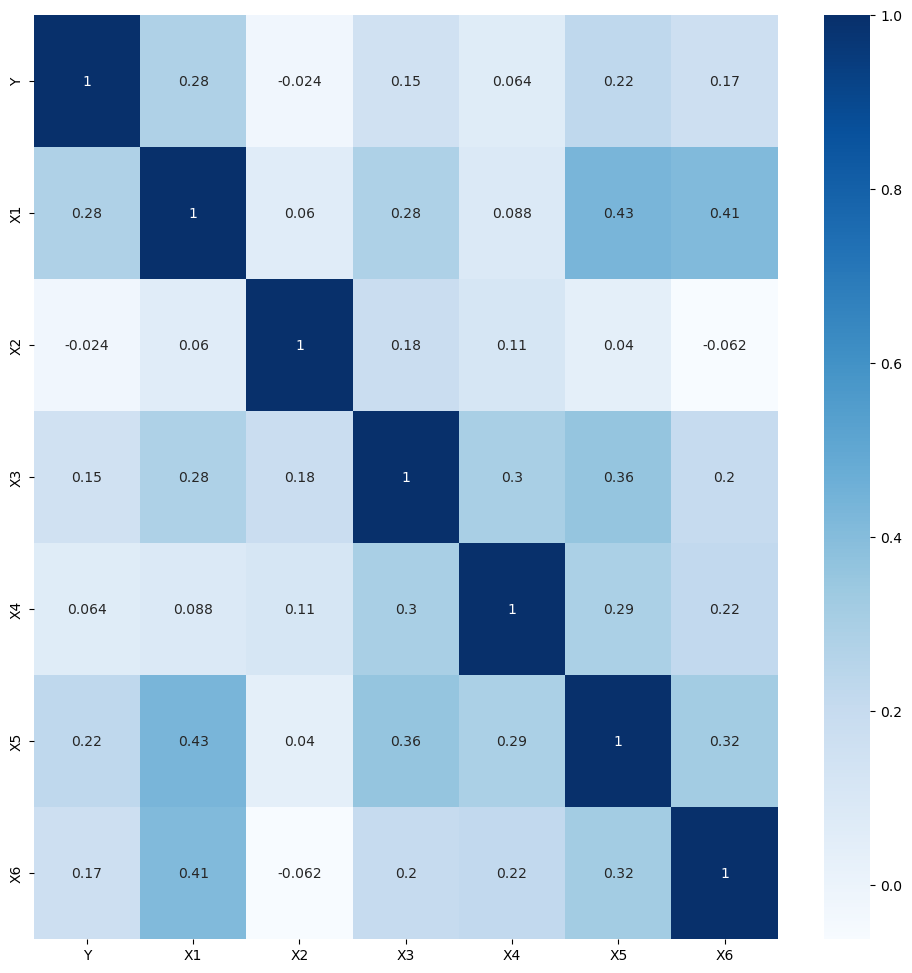

In [59]:
# Feature Selection
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Blues')
plt.show()

- **Most Important Feature**: 
  Based on our feature selection, the question associated with `X1` was identified as the most important feature, having the highest importance score of 0.28.

- **Minimal Set of Attributes**: 
  To preserve the most information about the problem while maximizing the predictability of our data, we would prioritize the questions associated with attributes `X1`, `X5`, and `X6` given their higher importance scores.

- **Questions for Consideration in Future Surveys**: 
  The question corresponding to `X2` has a negative importance score of -0.024. This suggests that it may not be contributing positively to our model's predictions and could be a candidate for removal in our next survey to streamline the process. 